<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°071


<a id='p1'></a>
## I.- Problema 01


<img src="https://plus.unsplash.com/premium_photo-1661963439471-0d0eeb1330d4?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y2FsaWZvcm5pYSUyMGhvdXNlfGVufDB8fDB8fHww" width = "400" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [4]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1. Definicion del problema: El objetivo de este análisis es predecir el valor medio de las propiedades en diferentes áreas de California, utilizando las características proporcionadas en el conjunto de datos.
A través del análisis, esperamos identificar las variables más influyentes para predecir el valor de las viviendas, tales como la proximidad al océano, el ingreso medio de los hogares, la población y la edad de las viviendas. Utilizaremos varios modelos de regresión para encontrar el que mejor se ajuste a los datos. Al final, compararemos los modelos y seleccionaremos el que tenga un mejor rendimiento según las métricas de error (MAE, MSE, RMSE, etc.).

2. Estadistica descriptiva:

In [5]:
# Estadística descriptiva del dataset
housing.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


3. Visualizacion descriptiva: Se haran histogramas,graficos de correlacion entre variables y graficos de dispersion.

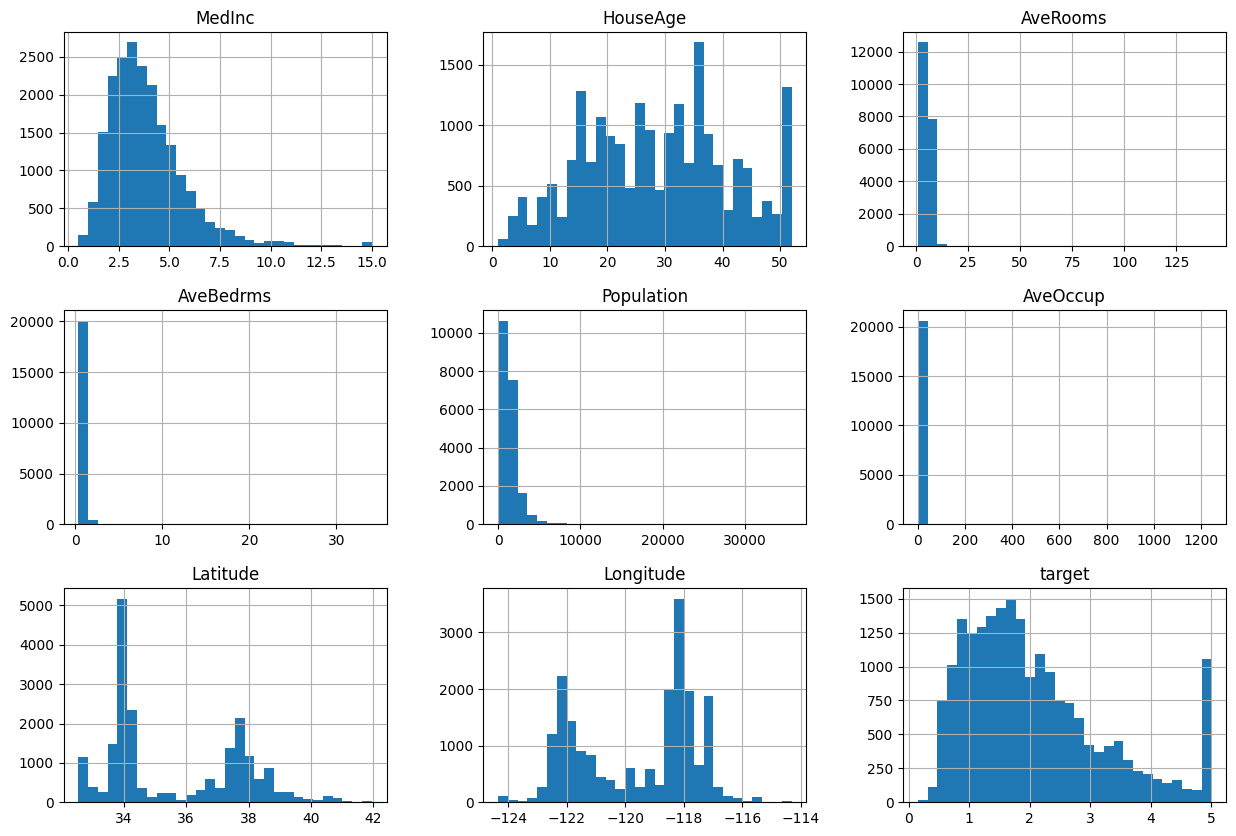

In [6]:
import matplotlib.pyplot as plt
housing.hist(bins=30, figsize=(15, 10))
plt.show()


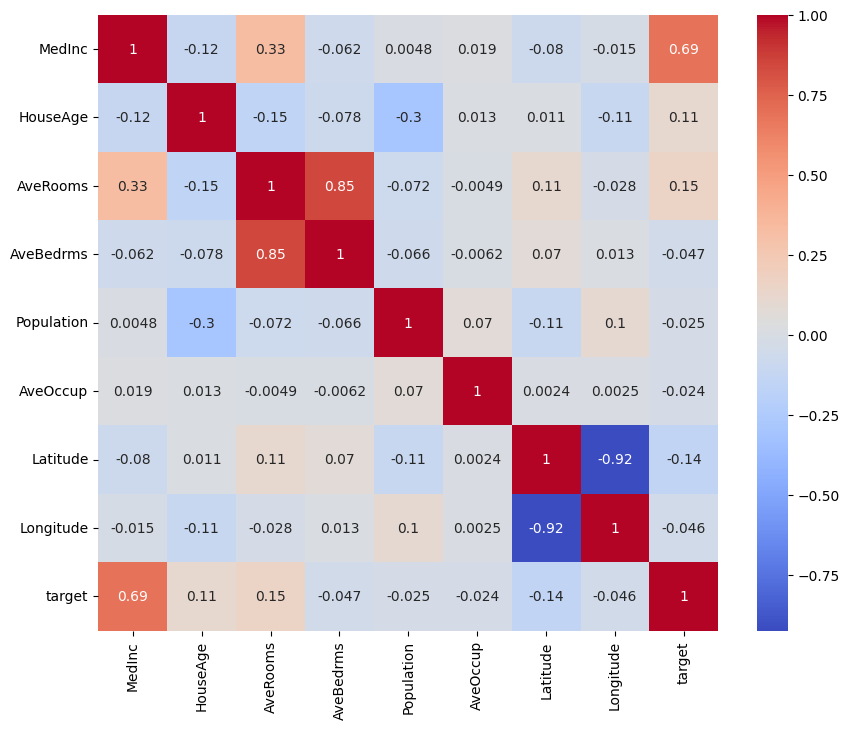

In [7]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(housing.corr(), annot=True, cmap="coolwarm")
plt.show()


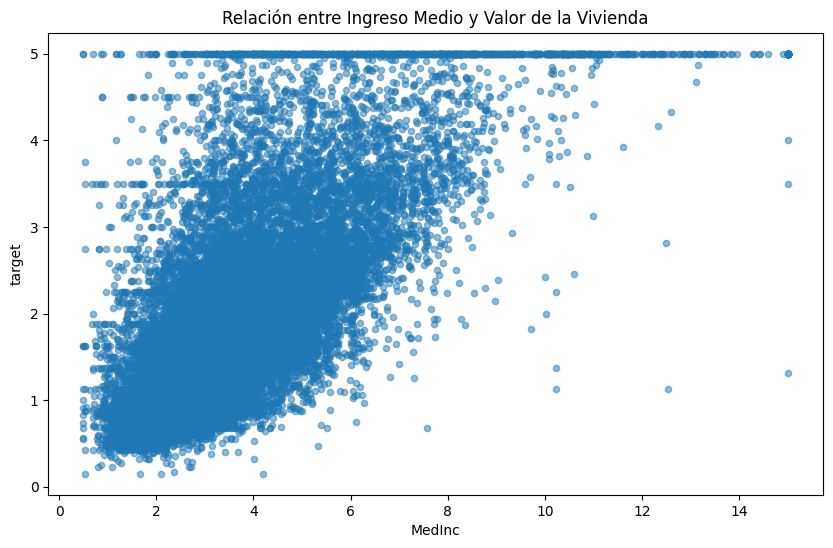

In [8]:
housing.plot(kind="scatter", x="MedInc", y="target", alpha=0.5, figsize=(10, 6))
plt.title("Relación entre Ingreso Medio y Valor de la Vivienda")
plt.show()


Los gráficos generados permiten observar relaciones importantes en los datos. Los histogramas muestran que el ingreso medio (MedInc) tiene una distribución sesgada a la derecha, mientras que el valor de la propiedad (target) es más uniforme. El mapa de calor de correlaciones revela que la variable MedInc tiene una correlación positiva significativa con el valor de la propiedad (0.69), lo que indica que a mayor ingreso medio, mayor es el valor de las propiedades. Además, el diagrama de dispersión refuerza esta relación, mostrando que a medida que aumenta el ingreso medio, el valor de la propiedad también tiende a subir.

4. Preprocesamiento

In [9]:
# Verificar si hay valores faltantes en las columnas
print(housing.isnull().sum())


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas numéricas
numerical_cols = housing.select_dtypes(include=['float64', 'int64']).columns

# Normalizamos las columnas numéricas
scaler = StandardScaler()
housing[numerical_cols] = scaler.fit_transform(housing[numerical_cols])

# Visualizamos los primeros valores del dataframe normalizado
housing.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900


No se tienen valores perdidos dentro de las variables de analisis. Tambien se normalizan estas para trabajarlas de manera mas sencilla.

5. Seleccion de modelo.
Para este caso se usaran 4 modelos, Regresion Lineal, Arbol de Decisiones, Bosque Aleatorio, K-Vecinos mas cercanos, en donde se dividira el conjunto de datos en entrenamiento (80%) y (20%) prueba. Tambien se evaluara el error que cada uno de estos tiene

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Dividimos los datos en conjunto de entrenamiento y prueba
X = housing.drop(columns="target")
y = housing["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos una lista de los modelos a comparar
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Decisión": DecisionTreeRegressor(),
    "Bosque Aleatorio": RandomForestRegressor(),
    "K-Vecinos más cercanos": KNeighborsRegressor()
}

# Entrenamos y evaluamos cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{nombre}: MSE = {mse:.4f}")


Regresión Lineal: MSE = 0.4175
Árbol de Decisión: MSE = 0.3807
Bosque Aleatorio: MSE = 0.1916
K-Vecinos más cercanos: MSE = 0.3258


6. Metricas y analisis de resultados: se utilizara aparte del MSE , MAE, RMSE y R2.

In [12]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluamos los modelos con más métricas
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"Resultados para {nombre}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²: {r2:.4f}")
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Resultados para Regresión Lineal:
  MSE: 0.4175
  MAE: 0.4621
  RMSE: 0.6461
  R²: 0.5758


Resultados para Árbol de Decisión:
  MSE: 0.3807
  MAE: 0.3983
  RMSE: 0.6170
  R²: 0.6132




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Resultados para Bosque Aleatorio:
  MSE: 0.1916
  MAE: 0.2846
  RMSE: 0.4377
  R²: 0.8053


Resultados para K-Vecinos más cercanos:
  MSE: 0.3258
  MAE: 0.3861
  RMSE: 0.5708
  R²: 0.6690




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Los resultados obtenidos muestran que el Bosque Aleatorio es el modelo con mejor desempeño, ya que tiene el menor error cuadrático medio (MSE = 0.1916) y la mayor capacidad explicativa con un R² de 0.8053, lo que indica que explica el 80% de la varianza en los datos. Comparado con otros modelos, como la Regresión Lineal y K-Vecinos más cercanos, que tienen un R² de 0.5758 y 0.6690 respectivamente, y errores más altos, el bosque aleatorio destaca como la mejor opción. El Árbol de Decisión también ofrece un desempeño relativamente bueno con un R² de 0.6132, pero sigue siendo inferior al bosque aleatorio.

7. Visualizacion de resultados del modelo

In [16]:
# Entrenar el modelo de Regresión Lineal y obtener predicciones
from sklearn.linear_model import LinearRegression
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

# Entrenar el modelo de Árbol de Decisión y obtener predicciones
from sklearn.tree import DecisionTreeRegressor
modelo_dt = DecisionTreeRegressor()
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_test)

# Entrenar el modelo de Bosque Aleatorio y obtener predicciones
from sklearn.ensemble import RandomForestRegressor
modelo_rf = RandomForestRegressor()
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

# Entrenar el modelo de K-Vecinos más Cercanos y obtener predicciones
from sklearn.neighbors import KNeighborsRegressor
modelo_knn = KNeighborsRegressor()
modelo_knn.fit(X_train, y_train)
y_pred_knn = modelo_knn.predict(X_test)


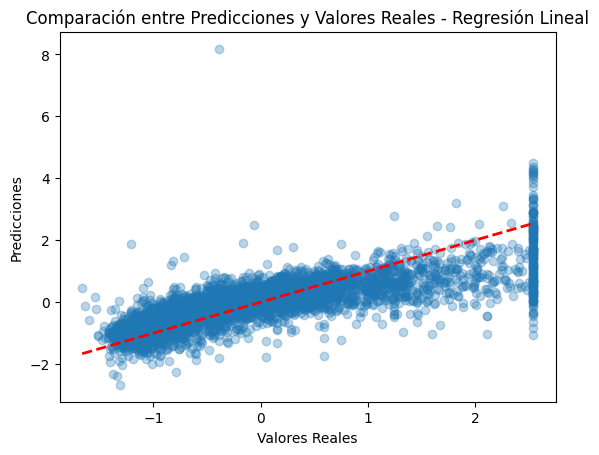

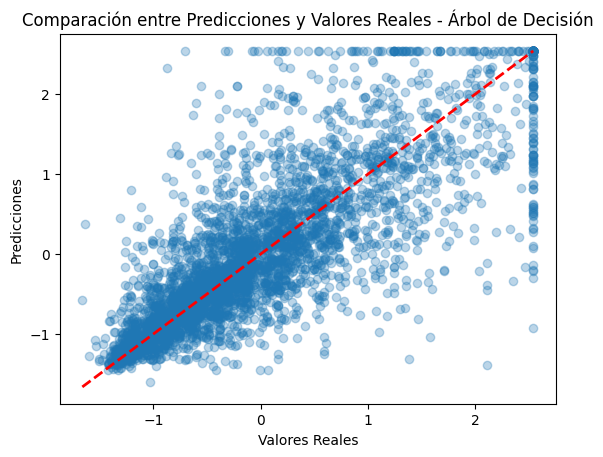

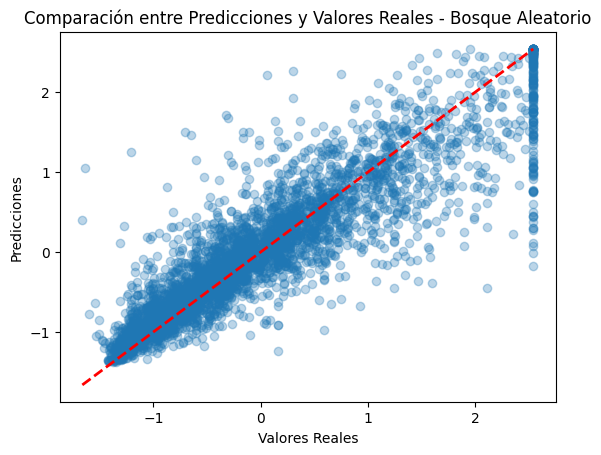

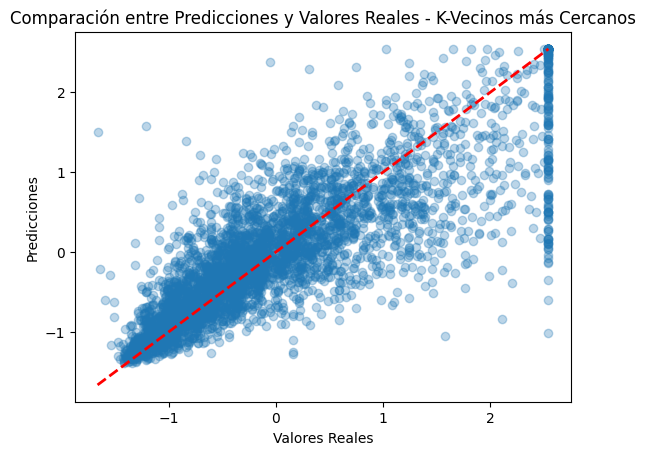

In [17]:
# Para Regresión Lineal
graficar_predicciones(y_test, y_pred_lr, "Regresión Lineal")

# Para Árbol de Decisión
graficar_predicciones(y_test, y_pred_dt, "Árbol de Decisión")

# Para Bosque Aleatorio
graficar_predicciones(y_test, y_pred_rf, "Bosque Aleatorio")

# Para K-Vecinos más Cercanos
graficar_predicciones(y_test, y_pred_knn, "K-Vecinos más Cercanos")


Los gráficos muestran que el modelo de bosque aleatorio tiene el mejor ajuste entre las predicciones y los valores reales, con la menor dispersión en torno a la línea de referencia. Los modelos de regresión lineal y árbol de decisión muestran una mayor dispersión, lo que indica menor precisión, especialmente en los valores extremos. El modelo de K-vecinos más cercanos también ofrece un buen ajuste, pero con más variabilidad en las predicciones en comparación con el bosque aleatorio. En general, el bosque aleatorio destaca como el más preciso.

8. Conclusiones:
Tras evaluar diversos modelos de predicción para estimar el valor medio de las propiedades en California, el bosque aleatorio se posiciona como el mejor modelo en términos de precisión, superando a la regresión lineal, el árbol de decisión y los k-vecinos más cercanos. Este modelo presentó los menores errores y mejor correlación entre las predicciones y los valores reales. Sin embargo, cada modelo tiene sus ventajas dependiendo del contexto y las necesidades.